<a href="https://colab.research.google.com/github/ihab09/CE888/blob/main/lab_2/Copy_of_Copy_of_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [ ]:
# Explore the dataset
df

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0
5,6,9.0
6,7,10.0
7,8,8.0
8,9,22.0
9,10,10.0


In [ ]:
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
  # sample_size = 9
  # n_bootstraps = 10
  data_mean = []
  i = 0
  all_bootstraps = np.empty((n_bootstraps, sample_size))
  bootstrap_means = []

  while i < n_bootstraps:

    size_itr = 0

    while size_itr < sample_size:
      all_bootstraps[i][size_itr] = np.random.choice(x)
      size_itr += 1

    i += 1

  # data_mean = np.mean(x)

  # print(round(data_mean, 2))
  # print(all_bootstraps)

  for each_bootstrap in all_bootstraps:
    bootstrap_means.append(np.mean(each_bootstrap))
    
  bootstrap_means.sort()
  
  data_mean = np.mean(bootstrap_means)

  upper = np.percentile(bootstrap_means, 97.5)
  lower = np.percentile(bootstrap_means, 2.5)

  return data_mean, lower, upper



In [ ]:
# Testing Playground

sample_size = 9
n_bootstraps = 10
data_mean = []
i = 0
all_bootstraps = np.empty((n_bootstraps, sample_size))
bootstrap_means = []

while i < n_bootstraps:

  size_itr = 0

  while size_itr < sample_size:
    all_bootstraps[i][size_itr] = np.random.choice(data)
    size_itr += 1

  i += 1



for each_bootstrap in all_bootstraps:
  bootstrap_means.append(np.mean(each_bootstrap))
  
bootstrap_means.sort()
data_mean = np.mean(bootstrap_means)

upper = np.percentile(bootstrap_means, 97.5)
lower = np.percentile(bootstrap_means, 2.5)

print("The array of samples:\n", all_bootstraps)
print("\nMean for the whole data:", round(data_mean, 3))
print("Sorted means of bootstraps:", bootstrap_means)
print("Lower and upper boundaries:", lower, upper)

# bootstrap_mean(x, sample_size, n_bootstraps)

The array of samples:
 [[10.  2.  7.  5. 10.  8. 22.  4.  2.]
 [ 8.  5.  9.  2. 20. 22. 22. 10.  8.]
 [10. 20.  2.  9.  5.  9.  2. 13. 10.]
 [ 9.  2.  5.  5.  8.  4.  2. 10. 22.]
 [ 5.  8. 20.  7.  4. 22.  8.  9.  7.]
 [ 8.  2.  5.  5. 10.  8. 10. 10.  2.]
 [ 8.  2.  4.  9.  7.  2. 10.  9.  9.]
 [ 9.  2.  7. 20.  7.  4.  2.  8.  7.]
 [ 7.  5.  5.  9.  4.  9.  8.  2. 13.]
 [ 9. 10.  4. 10. 13.  5. 10.  8.  8.]]

Mean for the whole data: 8.2
Sorted means of bootstraps: [6.666666666666667, 6.666666666666667, 6.888888888888889, 7.333333333333333, 7.444444444444445, 7.777777777777778, 8.555555555555555, 8.88888888888889, 10.0, 11.777777777777779]
Lower and upper boundaries: 6.666666666666667 11.377777777777778


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

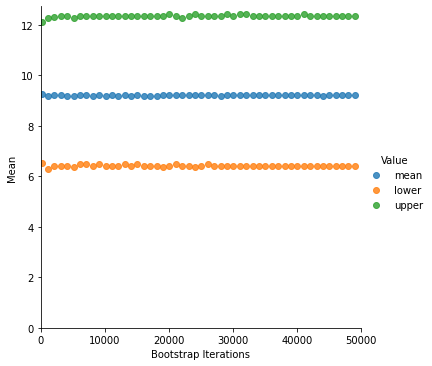

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [ ]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  data_std = []
  i = 0
  all_bootstraps = np.empty((n_bootstraps, sample_size))
  bootstrap_stds = []

  while i < n_bootstraps:

    size_itr = 0

    while size_itr < sample_size:
      all_bootstraps[i][size_itr] = np.random.choice(sample)
      size_itr += 1

    i += 1

  # print(round(data_mean, 2))
  # print(all_bootstraps)

  for each_bootstrap in all_bootstraps:
    bootstrap_stds.append(np.std(each_bootstrap))
    
  bootstrap_stds.sort()

  data_std = np.std(bootstrap_stds)
  upper = np.percentile(bootstrap_stds, ci + ((100-ci)/2) )
  lower = np.percentile(bootstrap_stds, (100 - ci)/2 )

  return data_std, lower, upper

In [ ]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  data_mean = []
  i = 0
  all_bootstraps = np.empty((n_bootstraps, sample_size))
  bootstrap_means = []

  while i < n_bootstraps:

    size_itr = 0

    while size_itr < sample_size:
      all_bootstraps[i][size_itr] = np.random.choice(sample)
      size_itr += 1

    i += 1

  # data_mean = np.mean(sample)

  # print(round(data_mean, 2))
  # print(all_bootstraps)

  for each_bootstrap in all_bootstraps:
    bootstrap_means.append(np.mean(each_bootstrap))
    
  bootstrap_means.sort()

  data_mean = np.mean(bootstrap_means)

  upper = np.percentile(bootstrap_means, ci + ((100-ci)/2) )
  lower = np.percentile(bootstrap_means, (100 - ci)/2 )

  return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

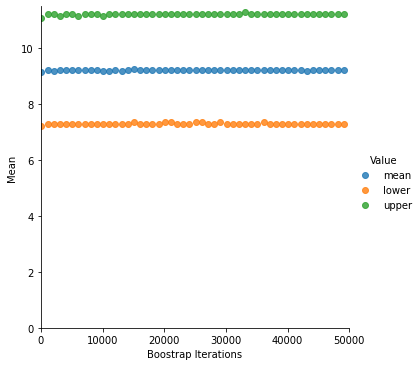

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df


,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
import matplotlib.pyplot as plt

data_frame = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data_frame

current_fleet = data_frame['Current fleet']
print(current_fleet)

new_fleet = data_frame['New Fleet']
new_fleet.dropna(inplace=True)
print(new_fleet)


0      18
1      15
2      18
3      16
4      17
       ..
244    27
245    27
246    32
247    28
248    31
Name: Current fleet, Length: 249, dtype: int64
0     24.0
1     27.0
2     27.0
3     25.0
4     31.0
      ... 
74    34.0
75    38.0
76    32.0
77    38.0
78    32.0
Name: New Fleet, Length: 79, dtype: float64


(array([ 5.,  5., 12.,  8., 20., 13., 11.,  3.,  0.,  2.]),
 array([18. , 20.9, 23.8, 26.7, 29.6, 32.5, 35.4, 38.3, 41.2, 44.1, 47. ]),
 <a list of 10 Patch objects>)

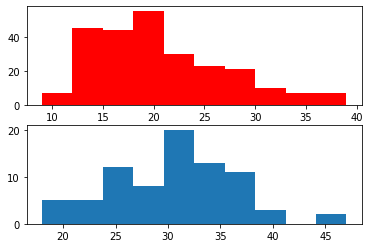

In [ ]:
# Set up for stacked plots
plt.subplot(2,1,1)
plt.hist(current_fleet, color='r')

# Plot cumulative dist
plt.subplot(2,1,2)
plt.hist(new_fleet)

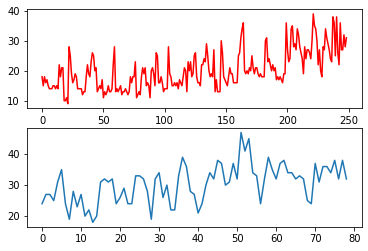

In [ ]:
# Set up for stacked plots
plt.subplot(2,1,1)
plt.plot(current_fleet, color='r')

# Plot cumulative dist
plt.subplot(2,1,2)
plt.plot(new_fleet)

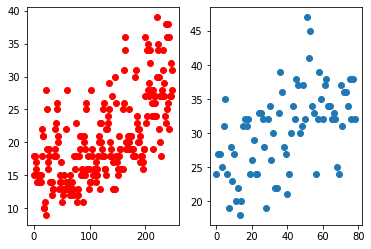

In [ ]:
# Set up for stacked plots
plt.subplot(1,2,1)
plt.scatter(np.arange(0, 249, 1), current_fleet, color='r')

# Plot cumulative dist
plt.subplot(1,2,2)
plt.scatter(np.arange(0, 79, 1), new_fleet)

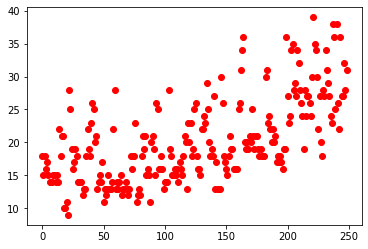

In [ ]:
plt.scatter(np.arange(0, 249, 1), current_fleet, color='r')

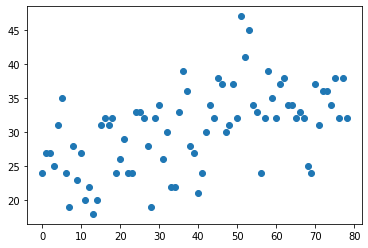

In [ ]:
plt.scatter(np.arange(0, 79, 1), new_fleet)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:
# <---INSERT YOUR CODE HERE--->
print("Mean, lower and upper bounds of the current fleet:", bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 100, 95))
print("Mean, lower and upper bounds of the new fleet:", bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 10000, 95))

Mean, lower and upper bounds of the current fleet: (20.123413654618474, 19.368975903614455, 21.156124497991968)
Mean, lower and upper bounds of the new fleet: (30.475882278481016, 29.139240506329113, 31.823101265822782)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

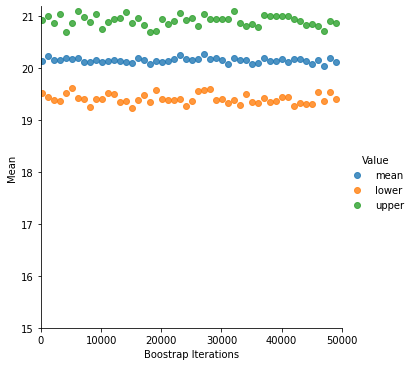

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 100, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(15,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

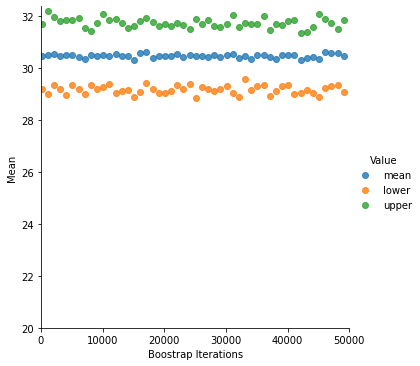

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 100, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(20,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [ ]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):

  """
  sample1: 1D array
  sample2: 1D array (note that the size of the two arrays can be different)
  n_permutations: number of permutations to calculate the p-value
  """
  
  bigger = 0
  i = 0
  # t_obs is the observed difference in mean
  t_obs = np.mean(sample2) - np.mean(sample1)
  # print(t_obs)   currently around 10
  concatenated_arr = np.concatenate((sample1, sample2))
  
  while i < n_permutations:
    permuted_arr = np.random.permutation(concatenated_arr)

    p_current = permuted_arr[:int(len(permuted_arr)/2)]
    p_new = permuted_arr[int(len(permuted_arr)/2):]

    # print(p_new)
    # t_perm is the difference between the means of simulated current and new samples
    t_perm = np.mean(p_new) - np.mean(p_current)
    
    # delete this
    # t_perm_list.append(t_perm)

    if t_perm > t_obs: bigger += 1
    # print(t_perm)
    i += 1


  # print("Bigger", bigger)
  pvalue = bigger/n_permutations

  return pvalue


In [ ]:

sample1 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
sample2 = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

permut_test(sample1, sample2, 20000)


0.03225

In [ ]:
# testing playground

def permut_test(sample1, sample2, n_permutations):
  bigger = 0
  i = 0
  # t_obs is the observed difference in mean
  t_obs = np.mean(sample2) - np.mean(sample1)
  # print(t_obs)   currently around 10
  concatenated_arr = np.concatenate((sample1, sample2))
  
  while i < n_permutations:
    permuted_arr = np.random.permutation(concatenated_arr)

    p_current = permuted_arr[:int(len(permuted_arr)/2)]
    p_new = permuted_arr[int(len(permuted_arr)/2):]

    # print(p_new)
    # t_perm is the difference between the means of simulated current and new samples
    t_perm = np.mean(p_new) - np.mean(p_current)
    
    # delete this
    # t_perm_list.append(t_perm)

    if t_perm > t_obs: bigger += 1
    # print(t_perm)
    i += 1


  # print("Bigger", bigger)
  pvalue = bigger/n_permutations

  return pvalue


sample1 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
sample2 = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

permut_test(sample1, sample2, 20000)


0.03305

In [ ]:
# Q8: 
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

print(len(dem_share_PA))
print(len(dem_share_OH))

pa_votes = np.array(dem_share_PA)
oh_votes = np.array(dem_share_OH)

67
88


In [ ]:
print("Mean, lower and upper bounds of Pennsylvania votes:", bootstrap_mean_ci(pa_votes, pa_votes.shape[0], 20000, 95))
print("Mean, lower and upper bounds of Ohio votes:", bootstrap_mean_ci(oh_votes, oh_votes.shape[0], 20000, 95))

print(permut_test(oh_votes, pa_votes, 10000))

Mean, lower and upper bounds of Pennsylvania votes: (45.4636046641791, 43.18355223880596, 47.820197761194024)
Mean, lower and upper bounds of Ohio votes: (44.31111776704545, 42.24928409090909, 46.35375284090909)
0.2372


In [ ]:
# Q2: The 80% confidence interval for the mean of the customers dataset using 10000 iterations is (Answer,Answer). Give your answer including the first two decimal points (e.g., 1.23).

bootstrap_mean_ci(data, data.shape[0], 10000, 80)


(9.172471428571429, 7.285714285714286, 11.214285714285714)

In [ ]:
# Q3: The 80% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 iterations is (Answer,Answer). Give your answer including the first two decimal points (e.g., 1.23).

bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 10000, 80)


(30.483197468354426, 29.60759493670886, 31.354430379746834)

In [ ]:
# Q4: The 85% confidence interval for the standard deviation of the customers dataset using 10000 iterations is (Answer,Answer). Give your answer including the first two decimal points (e.g., 1.23).

bootstrap_std_ci(data, data.shape[0], 10000, 85)



(1.1977516760815246, 3.2646842520075543, 6.943283349645857)

In [ ]:
# The 99% confidence interval for the standard deviation of the new fleet in the vehicles dataset using 10000 iterations is (Answer,Answer). Give your answer including the first two decimal points (e.g., 1.23).

bootstrap_std_ci(new_fleet, new_fleet.shape[0], 10000 , 99)

(0.4516351767670392, 4.8804978761634725, 7.170264197576037)